## Intern: Rajvi Desai
### Domain: Data science and Business Analytics skills
### Grip July'22
### The sparks foundation
### Task 1 : Prediction using supervised learning
### Method used: Simple linear regression

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the data 
data=pd.read_csv("student_scores.csv")
print('Data Imported Successfully')

#display first 10 records
data.head(10)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


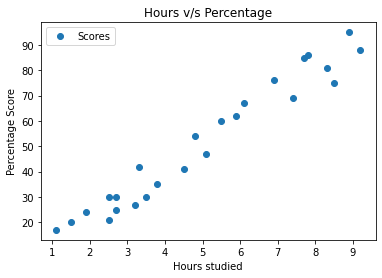

In [3]:
#let's plot the data points on 2D graph to manually see the relationship between data.
#plotting the distribution of scores
data.plot(x='Hours',y='Scores',style='o')

plt.title('Hours v/s Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')

plt.show()

In [4]:
#finding correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [5]:
#describing different parameters
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### As a result it can be seen that there is positive relation between hours studied and the percentage of score.

## Preparing the data

In [6]:
#prepare the data
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [7]:
#let's train and test the given data
#It can be done using scikit-learn's built in train_test_split() method
#for that import the required library and method

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Training the model

In [8]:
#train the algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('Training complete..')

Training complete..


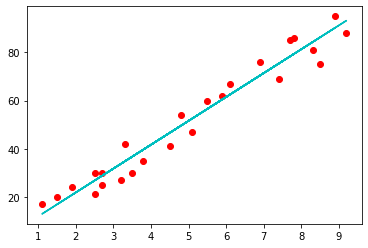

In [9]:
#now it's time to plot the regression line
line=regressor.coef_*x+regressor.intercept_

plt.scatter(x,y,color='r')
plt.plot(x,line,color='c')
plt.show()

## Predicting the data

In [10]:
#it's time to predict the data
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


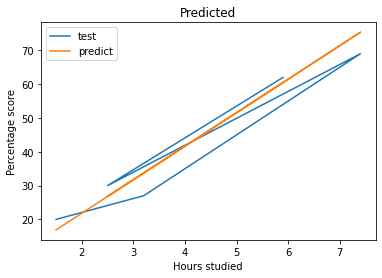

In [11]:
#test v/s predicted data plot
plt.plot(x_test,y_test,label="test")
plt.plot(x_test,y_pred,label="predict")
plt.title("Predicted")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.legend()
plt.show()

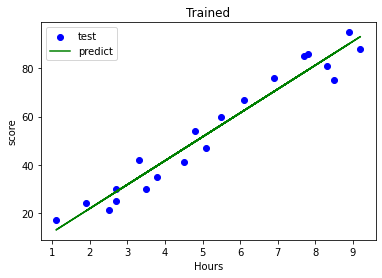

In [12]:
#Trained Data for testing and predicting
plt.scatter(x_train,y_train,label="test",color='b')
plt.plot(x_train,regressor.predict(x_train),label="predict",color='g')
plt.title("Trained")
plt.xlabel("Hours")
plt.ylabel("score")
plt.legend()
plt.show()

In [13]:
#let's compare actual v/s predicted
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
#testing different data
hours=[[2],[1.25],[6]]
own=regressor.predict(hours)
print('Number of hours : {}'.format(hours))
print('Predicted score : {}'.format(own))

Number of hours : [[2], [1.25], [6]]
Predicted score : [21.839473   14.40648064 61.48209893]


### If a student studies 9.5 hours a day

In [15]:
# testing the data asked
hours=[[9.25]]
own=regressor.predict(hours)
print('Number of hours : {}'.format(hours[0][0]))
print('Predicted score : {}'.format(own[0]))

Number of hours : 9.25
Predicted score : 93.69173248737535


### Validating the accuracy of the model

In [16]:
print("Train: ",regressor.score(x_train,y_train)*100)
print("Test: ",regressor.score(x_test,y_test)*100)

Train:  95.15510725211553
Test:  94.54906892105355


In [17]:
# It can be seen that the model is quite accurate

### Evaluating the model

In [18]:
# It is the final step to evaluate the performance of the algorithm
from sklearn import metrics

print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.183859899002975


In [19]:
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error:  21.598769307217406


In [20]:
from sklearn.metrics import r2_score
print('r^2 Score {}'.format(r2_score(y_test,regressor.predict(x_test))))


r^2 Score 0.9454906892105355


In [21]:
from sklearn.metrics import max_error
print('Maximum Error {}'.format(max_error(y_test,y_pred)))

Maximum Error 6.732260779489849


### Conclusion:
#####  Correlation between scores and hours is 0.9761 which is a positive relationship. Predicting the score of student based on 9.25 hours/day, using simple linear regression model is a predicted percentage of 93.69